## What species are most commonly present
- Most commonly present 
- Most abundant (on average)
- which ones change when adding new MAGs

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from functools import reduce
import matplotlib.pyplot as plt

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_63018/3013099634.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df1 = pd.read_csv('../data/250830_tax_species.gtdb.summary.csv')
df1 = df1.rename(columns={"n_found": "n_found_gtdb"})
df1 = df1.rename(columns={"avg_fraction": "avg_fraction_gtdb"})


In [3]:
df2 = pd.read_csv('../data/250830_tax_species.gtdbmag.summary.csv')
df2 = df2.rename(columns={"n_found": "n_found_gtdbmag"})
df2 = df2.rename(columns={"avg_fraction": "avg_fraction_gtdbmag"})


In [4]:
# merge
df =pd.merge(df1, df2, on="lineage", how="outer")
df = df.fillna(0)

df = df[df["lineage"] != "unclassified"]

In [5]:
# for these species I want number of strains
df["species"] = df["lineage"].str.split(";s__").str[-1]
df["genus"] = df["lineage"].str.split(";g__").str[1].str.split(";").str[0]

In [7]:
n_metaG =  300
df = df[(df["n_found_gtdbmag"] >= n_metaG)]


In [36]:
len(df)

4851

In [8]:
df["n_found_gtdbmag"] = df["n_found_gtdbmag"].astype(int)

/var/folders/b5/q0xwwzss4dd82xbt_8lh5qph0000gn/T/ipykernel_63018/479876604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["n_found_gtdbmag"] = df["n_found_gtdbmag"].astype(int)


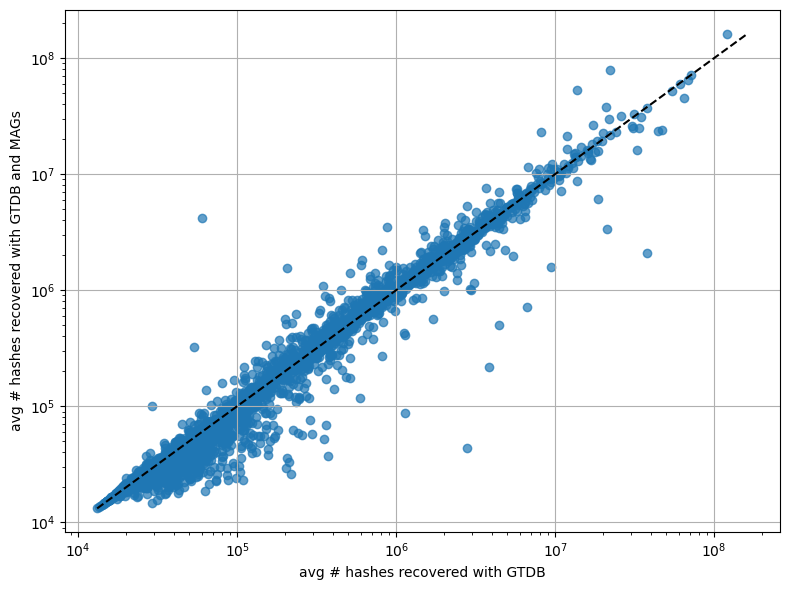

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xlabel("avg_fraction_gtdb")
plt.ylabel("avg_fraction_gtdbmag")
lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("avg # hashes recovered with GTDB")
plt.ylabel("avg # hashes recovered with GTDB and MAGs")
#plt.title("Scatterplot of avg_gtdb vs avg_gtdbmag per species")
plt.grid(True)
plt.tight_layout()
# plt.show()
#plt.savefig('../plots/250908_hashes_gtdb.v.MAGs.genus.png')

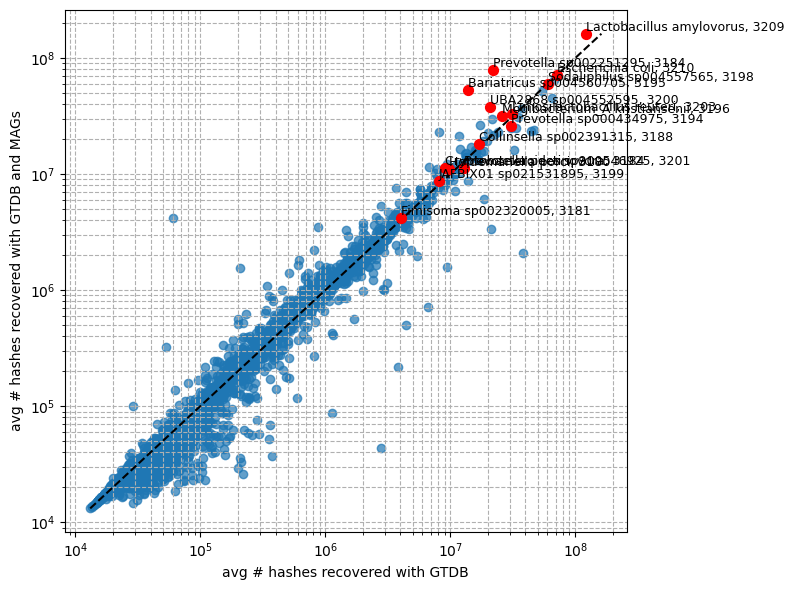

In [10]:
top10 = df.nlargest(15, "n_found_gtdbmag")

plt.figure(figsize=(8,6))
#plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("avg # hashes recovered with GTDB")
plt.ylabel("avg # hashes recovered with GTDB and MAGs")

lims = [min(df["avg_fraction_gtdb"].min(), df["avg_fraction_gtdbmag"].min()),
        max(df["avg_fraction_gtdb"].max(), df["avg_fraction_gtdbmag"].max())]

plt.plot(lims, lims, linestyle="--", color="black")


# scatter for all points
plt.scatter(df["avg_fraction_gtdb"], df["avg_fraction_gtdbmag"], alpha=0.7)

# highlight top10
plt.scatter(top10["avg_fraction_gtdb"], top10["avg_fraction_gtdbmag"],
            color="red", s=50, zorder=3)

for i, row in top10.iterrows():
    label = f"{row['species']}, {row['n_found_gtdbmag']}"
    plt.text(row["avg_fraction_gtdb"], row["avg_fraction_gtdbmag"], label,
             fontsize=9, ha="left", va="bottom",)
plt.grid(True, which="both", ls="--")
plt.tight_layout()


#plt.savefig('../plots/250904_MAGs_over300_only.png')
